# Text classification :: Spam detection

## Task 

We want to build a Spam detector which, given examples of spam emails (e.g. flagged by users) and examples of regular (non-spam, also called "ham") emails, learns how to flag new unseen emails as spam or non-spam.

## Data

We will use the [SpamAssassin](https://spamassassin.apache.org/) public email corpus. This dataset contains ~6'000 labeled emails with a ~30% spam ratio. If you want to learn more about this dataset, check [this](https://spamassassin.apache.org/old/publiccorpus/). (*Note: Datasets of text are called corpora and samples are called documents.*) 

The dataset has been downloaded for you and is available in the *data* folder.

## Notebook overview

* Load the data
* Text preprocessing
* Data exploration
* Feature extraction
* Build a spam detector
* What did our model learn? Error analysis

## 1. The data

In [1]:
# Load libraries and helper functions

import tools

In [2]:
# Load the data

df = tools.load_data()

Data loaded.
Data size: (5832, 2)


Let's have a look at a few rows from the dataset.

***Note:*** *label* is 0 for *non-spam* and 1 for *spam*.

In [3]:
df.sample(3)

,label,text
2761,0,"URL: http://jeremy.zawodny.com/blog/archives/000193.html Date: 2002-09-25T22:51:45-08:00 First of all, thanks for all the great feedback. I see that a lot of folks are pulling it now. I'm working on some stats. It'll be interesting to see which stocks bloggers tend to watch, which aggregators they use,..."
2514,0,"Forwarded-by: Per Hammer <perh@inrs.co.uk> http://news.bbc.co.uk/1/hi/world/asia-pacific/2218715.stm Brothel duty for Australian MP A conservative Member of Parliament in Australia is set to spend the day as a ""slave"" at one of Western Australia's most notorious brothels. Liberal Party member Barry Haase was ""won"" in a charity auction after the madam of Langtree's brothel in the mining town of Kalgoorlie made the highest offer for his services for a day. [...] ""I hope he will leave with an informed decision on what Australian brothels are all about and it will help him in his political career to make informed decisions that he might not have been able to make before,"" Ms Kenworthy said. Mr Haase, a member of Prime Minister John Howard's party seemed relaxed about the prospect of working in a brothel. ""You can't be half-hearted about fundraising for significant charities and I think I'm big enough to play the game,"" he said."
1524,1,"<html> <body bgcolor=""#FFFFFF"" text=""#000000"" link=""#6666CC"" vlink=""#999999"" alink=""#663333""> <table border=""0"" cellpadding=""0"" cellspacing=""0"" width=""84%""> <tr> <td height=""27"" valign=""top""> <font face=""arial, Arial, Helvetica""> <p><font color=""#009933"" face=""Arial, Helvetica, sans-serif""><font color=""#006633"" size=""5""><b><font color=""#660099"">Promote Your Product or Service to Millions Today!</font></b></font></font></p> </font></td> </table> <table dir=""ltr"" border=""0"" cellpadding=""0"" cellspacing=""0"" width=""85%"" height=""487""> <tr> <td valign=""top"" width=""385"" height=""487""> <p><img src=""http://81.9.8.7/OS53062.JPG"" width=""385"" height=""527""></p> </td> <td valign=""top"" width=""1"" height=""487""></td> <!--msnavigation--> <td valign=""top"" width=""455"" height=""487""> <font face=""arial, Arial, Helvetica""> <p style=""margin-top: 0; margin-bottom: 0"">&nbsp;</p> </font><font color=""#009933"" face=""Arial, Helvetica, sans-serif""><b></b></font> <p><font face=""Arial, Helvetica, sans-serif""><font color=""#0000FF"" size=""4""><u><font color=""#660099"">E-Mail Marketing System</font></u></font></font><b><font face=""Arial, Helvetica, sans-serif""><font size=""3""><br> </font></font></b><font face=""Arial, Helvetica, sans-serif""><font size=""3""><font color=""#000000"">- Bulk e-mail will make you money so fast, your head will spin!<br> - Customers say &quot;we would no longer be in business without it&quot;<br> - New package deal includes everything you need.<br> <font size=""2"">See this product's web page</font></font><font color=""#FF0000""> </font><font color=""#666666""><a href=""http://81.9.8.7/E-Mail%20Marketing.htm""><font size=""4"">Click Here</font></a></font><br> </font></font></p> <p><font color=""#006633"" size=""3""><font face=""Arial, Helvetica, sans-serif"" color=""#0000FF"" size=""4""><u><font color=""#660099"">1 Million Business Leads on CD</font></u></font></font><font size=""3""><b><font face=""Arial, Helvetica, sans-serif""><br> </font></b><font face=""Arial, Helvetica, sans-serif""><font color=""#000000"">..."


Now, let's check the number of samples per class in the data.

Samples per class (%):
non-spam    70.3
spam        29.7
Name: label, dtype: float64




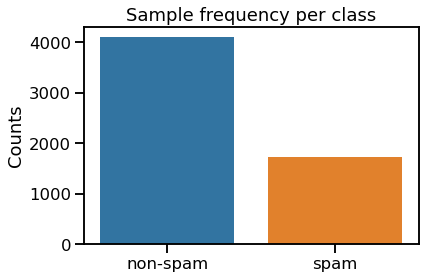

In [4]:
tools.plot_class_frequency(df)

## 2. Text preprocessing

Good text preprocessing is an essential part of every NLP project!

Our goal here is to build a model that distinguishes non-spam from spam. The idea here is to "clean" and "standardize" raw text before feeding it to our machine learning model. We need to keep as many "informative" words as possible, while discarding the "uniformative" ones. Removing unnecessary content, i.e. the "noise", from our texts will help to improve the accuracy of our models.

**Take a few minutes to look at the raw text. What do you think should be removed from the text?**

Below are a few pointers:

* HTML tags 
* URLs
* E-mail addresses
* Punctuation marks, digits (e.g. 2002, 1.1, ...)
* Multiple whitespace
* Case conversion (e.g. Dog vs dog, ...)
* English STOPWORDS (e.g. a, is, my, i, all, and, by...)
* ...

The *clean_corpus* function below takes care of all of that!

In [5]:
df = tools.clean_corpus(df)

print('Data cleaned')

Data cleaned


Let's have a look at a few "cleaned" examples.

In [6]:
tools.show_clean_text(df)


Original document:

See below for your Exit Information. ===============================================================
============================================= Dear Friend, You're about to discover how you can have
FIVE of your own Internet businesses set up and taking orders within 29 minutes...for less than half
of what most people spend on groceries! I'd like for you to know up front that I'm not an Internet
Guru...Not A Computer Wiz...And Not A Marketing Genius. First of all, I'll admit that I don't expect
you to believe a single word I say. After all, how many times a day are you BOMBARDED with some lame
"get-rich-quick" scheme on the Internet? You probably get a brand new promise of instant wealth
every few hours in your e-mail box and if you're anything like me, you've tried a few and been left
with nothing but a hole in your pocket! Well, I've got great news for you. Now you too can make
great money right from your home with your own auto-pilot "Internet Empire"! But be

## 3. Data Exploration :: What makes spam distinct?

### 2.1 Frequent words

Which words distinguish spam from non-spam? Can we  identify the words in a text that are the most informative about its topic?

Let's find the most frequent words in spam and non-spam.

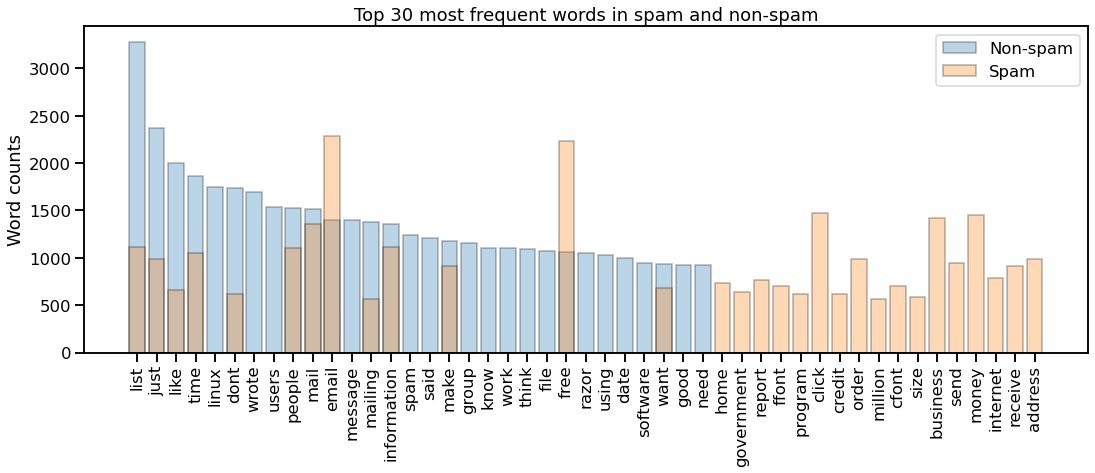

In [7]:
tools.plot_most_common_words(df=df, N=30)

**Frequent "spammish" words**: 

* click
* money
* business
* free
* email
* ...

**Frequent "non-spammish" words**:
* list
* linux
* message
* wrote
* users
* spam
* said
* file
* good
* ...

### 2.2 What about "spammish" signatures?

* Do spams contain more HTML tags? 
* Does non-spam contain more URLs and E-mail adresses? 
* Are spams mails longer than non-spam? 
* ...

Let's find out!

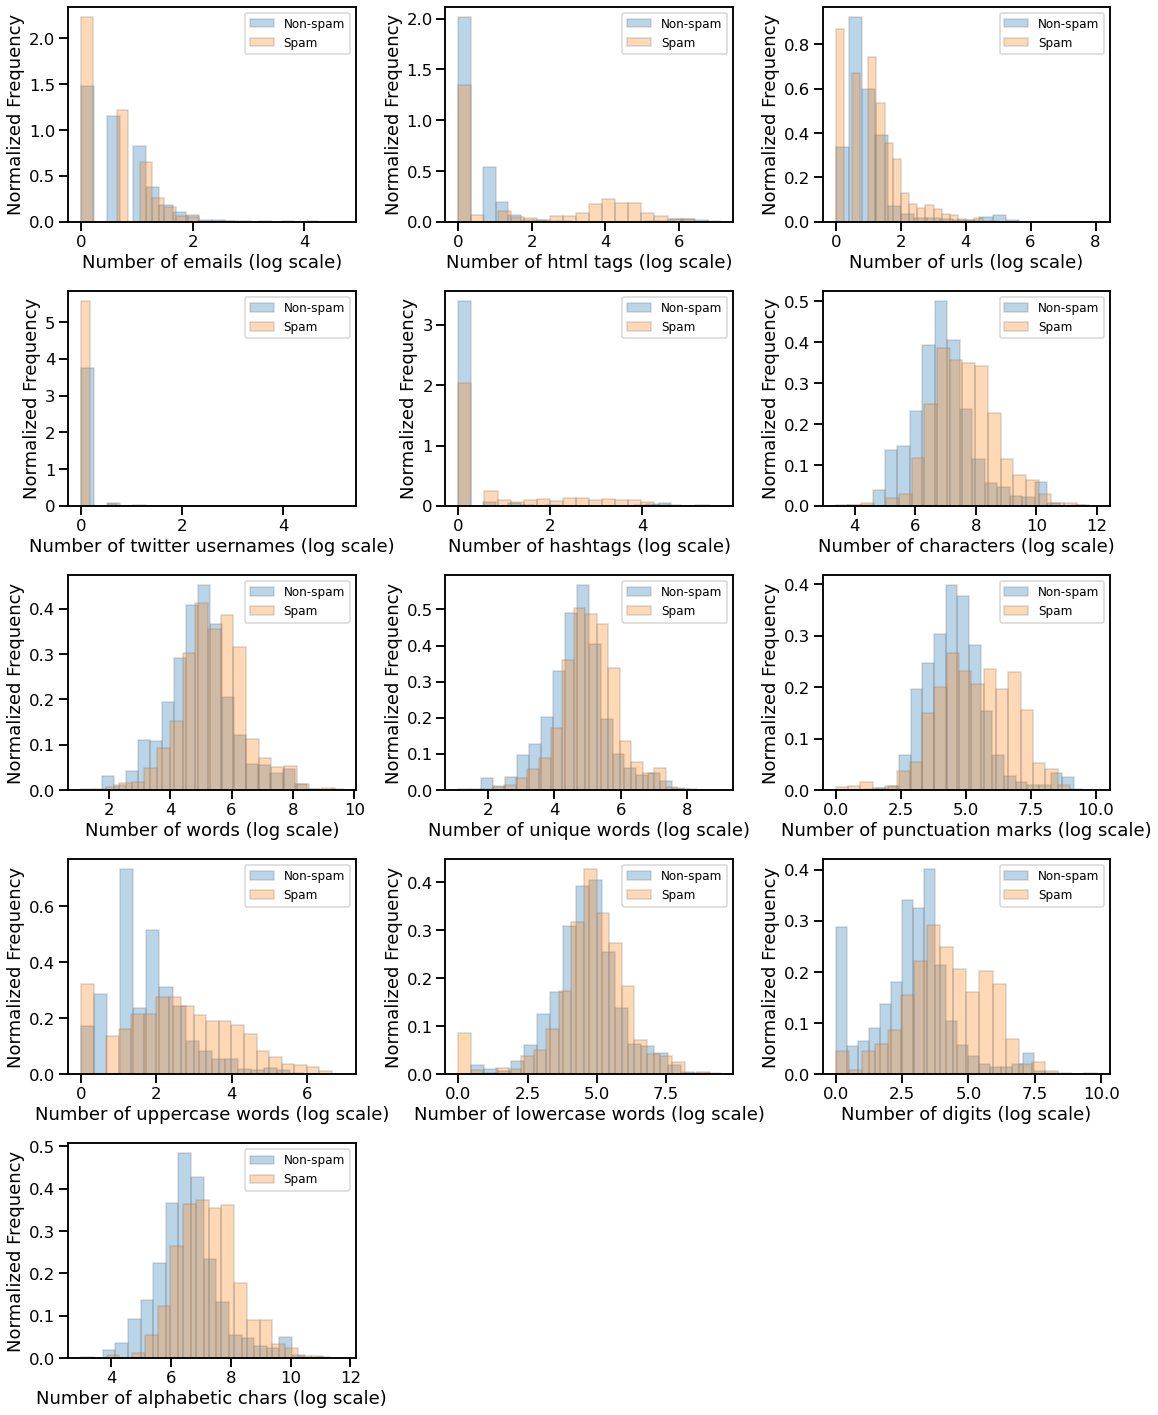

In [8]:
features = tools.get_features(df=df)

## 3. Feature engineering :: Extracting features from text

Computers don't understand natural language. So, how do we represent text?

One of the simplest but effective and commonly used models to represent text for machine learning is the ***Bag of Words*** model ([online documentation](https://en.wikipedia.org/wiki/Bag-of-words_model)). When using this model, we discard most of the structure of the input text (word order, chapters, paragraphs, sentences and formating) and only count how often each word appears in each text. Discarding the structure and counting only word occurencies leads to the mental image of representing text as a "bag".  

**Example:** Let our toy corpus contain four documents.

$ corpus = ['I\;enjoy\;paragliding.',  $  
$\hspace{2cm}'I\;like\;NLP.',$  
$\hspace{2cm}'I\;like\;deep\;learning.',$  
$\hspace{2cm}'O\;Captain!\;my\;Captain!']$ 

In [9]:
tools.show_bag_of_words_vector()

,captain,deep,enjoy,i,learning,like,my,nlp,o,paragliding
Text,,,,,,,,,,
I enjoy paragliding.,0,0,1,1,0,0,0,0,0,1
I like NLP.,0,0,0,1,0,1,0,1,0,0
I like deep learning.,0,1,0,1,1,1,0,0,0,0
O Captain! my Captain!,2,0,0,0,0,0,1,0,1,0


Bag of Words has converted all documents into numeric vectors. Each column represents a word from the corpus and each row one of the four documents. The value in each cell represents the number of times that word appears in a specific document. For example, the fourth document has the word `captain` occuring twice and the words `my` and `O` occuring once.

## 4. Build a spam detector

In the previous section, we saw how to perform text preprocessing and feature extraction from text. We are now ready to build our machine learning model for detecting spams. We will use a Logistic Regression classifier ([online documentation](https://en.wikipedia.org/wiki/Logistic_regression)).

First, we need to split the data into two sets: the `train` set and the `test` set. We will then use the train set to `fit` our model. The test set will be used to `evaluate` the performance of our model. 

### 4.1 Spam classification

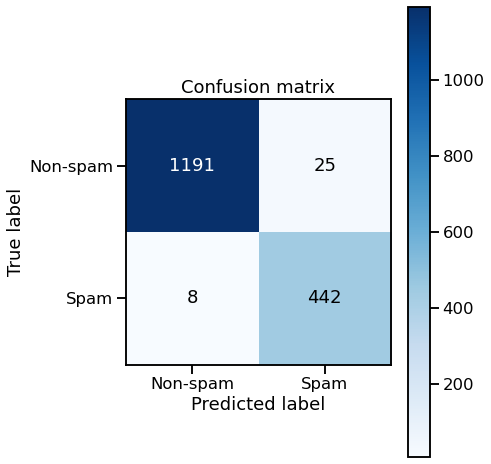

In [10]:
# Train/test splitting
df_train, df_test = tools.train_test_split_(df)

# Fit model on the train data
model = tools.fit_model(df_train)

# Print predictions on test set
tools.plot_confusion_matrix(df_test,model);

**Confusion matrices**  

Confusion matrices are a nice way of evaluating the performance of models for classification models. Rows correspond to the true classes and the columns to the predicted classes. Entries on the main diagonal of the confusion matrix correspond to correct predictions while the other cells tell us how many mistakes made our model ([online documentation]((https://en.wikipedia.org/wiki/Confusion_matrix))).

* The first row represents non-spam mails: 1'187 were correctly classified as 'non-spam', while 29 (~2,3%) were misclassified as 'spam'.
* The second row represents spam mails: 437 were correctly classified as 'spam', while 13 (~2,8%) were misclassified as 'non-spam'.

Our model did quite well!

### 4.2 What did our model learn from the data?

Our logistic regression model has learned which words are the most indicative of non-spam and which words are the most indicative of spam. The positive coefficients on the right correspond to words that, according to the model, are indicative of spam. The negative coefficients on the left correspond to words that, according to the model, are indicative of non-spam.

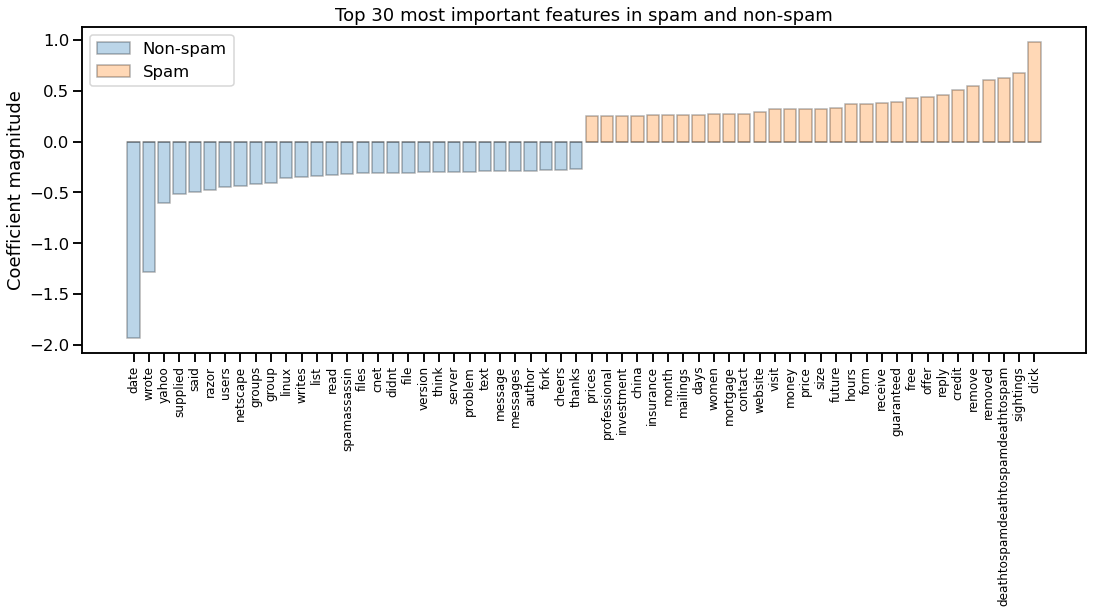

In [11]:
tools.visualize_coefficients(model, n_top_features=30)

According to the model, words such as "date", "wrote", "yahoo", "said", "linux", "author", ... are strong indicators of non-spam.  

Words such as "click", "credit", "remove", "free", "offer", "money" ... indicate spam. 

### 4.3 Error analysis :: Where does our model fail?

We will now analyze the misclassified mails in order to get some insights on where the model failed to make correct predictions. The *error_analysis* function below will show us the top features responsible for the model making a decision of prediction whether the mail is spam or non-spam.

In [ ]:
tools.error_analysis(df_test,model,doc_nbr=16)